In [1]:
import pandas as pd

# 读取数据
df = pd.read_csv("harris_tweets.csv")
df.head()

,url,twitterUrl,id,text,retweetCount,replyCount,likeCount,quoteCount,createdAt,bookmarkCount,...,location,full_text_lower,stopword,full_text_clean,punct_token,lemma,cluster,pca1,pca2,removed
0,https://x.com/BookofJahJah/status/185502312813...,https://twitter.com/BookofJahJah/status/185502...,1855023128130523392,One last grasp to insert Kamala somewhere huh ...,0,0,0,0,Fri Nov 08 23:02:33 +0000 2024,0,...,Where The Air Gets Cold,one last grasp to insert kamala somewhere huh ...,one last grasp insert kamala somewhere huh 😏 #...,"['one', 'last', 'grasp', 'insert', 'kamala', '...","['one', 'last', 'grasp', 'insert', 'kamala', '...",one last grasp insert kamala somewhere huh bla...,7,-0.228695,-0.425736,one last grasp insert somewhere huh blackmenfo...
1,https://x.com/patricia_kooy/status/18550171952...,https://twitter.com/patricia_kooy/status/18550...,1855017195299831808,"I'm in favor of ALL the Lefty, Liberal, Female...",1,0,2,0,Fri Nov 08 22:38:58 +0000 2024,0,...,"Michigan, USA","i'm in favor of all the lefty, liberal, female...","i'm favor lefty, liberal, female feminists sha...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...","['i', 'm', 'favor', 'lefty', 'liberal', 'femal...",i m favor lefty liberal female feminist shave ...,5,0.038153,0.024707,favor lefty liberal female feminist shave head...
2,https://x.com/arveela/status/1855015202426621976,https://twitter.com/arveela/status/18550152024...,1855015202426621952,@kristenmag Maybe from #Walz's daughter or who...,0,0,0,0,Fri Nov 08 22:31:03 +0000 2024,0,...,"Florida, USA",@kristenmag maybe from #walz's daughter or who...,@kristenmag maybe #walz's daughter whoever tho...,"['kristenmag', 'maybe', 'walz', 's', 'daughter...","['kristenmag', 'maybe', 'walz', 's', 'daughter...",kristenmag maybe walz s daughter whoever thoug...,5,0.004293,0.005875,kristenmag maybe walz daughter whoever thought...
3,https://x.com/jillbroderick/status/18550130148...,https://twitter.com/jillbroderick/status/18550...,1855013014841262336,"Wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...",0,0,0,0,Fri Nov 08 22:22:21 +0000 2024,0,...,NaN,"wordle 1,238 5/6\n\n⬛⬛⬛⬛🟨\n⬛🟨🟨⬛⬛\n⬛🟨⬛🟨🟨\n🟨🟩🟩🟨🟩...","wordle 1,238 5/6 ⬛⬛⬛⬛🟨 ⬛🟨🟨⬛⬛ ⬛🟨⬛🟨🟨 🟨🟩🟩🟨🟩 🟩🟩🟩🟩🟩...","['wordle', 'not', 'raids', 'started']","['wordle', 'not', 'raids', 'started']",wordle not raid start,5,0.041428,0.033264,wordle not raid start
4,https://x.com/OliverRush/status/18550125025325...,https://twitter.com/OliverRush/status/18550125...,1855012502532505856,"This girl gets it…\n\nDo you understand yet, #...",0,0,0,0,Fri Nov 08 22:20:19 +0000 2024,0,...,"Brooklyn, NY","this girl gets it…\n\ndo you understand yet, #...","girl gets it… understand yet, #harris2024 supp...","['girl', 'gets', 'it', 'understand', 'yet', 's...","['girl', 'gets', 'it', 'understand', 'yet', 's...",girl get it understand yet supporter kamalahar...,5,0.103475,0.063055,girl get understand yet supporter get this y a...


In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Initialize VADER SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Get compound scores for each review and store in a new column
df['compound_score'] = df['lemma'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

df[['lemma', 'compound_score']]

,lemma,compound_score
0,one last grasp insert kamala somewhere huh bla...,0.0000
1,i m favor lefty liberal female feminist shave ...,0.5859
2,kristenmag maybe walz s daughter whoever thoug...,0.6597
3,wordle not raid start,0.0000
4,girl get it understand yet supporter kamalahar...,-0.7579
...,...,...
6822,vice presidential debate could determinant ele...,0.9081
6823,f cking point kamala cause sad presidentialdebate,-0.4767
6824,kamala give biden pointer debate http t co,0.0000
6825,i m sorry supporter right watch debate show ei...,-0.2263


In [3]:
# Function to label sentiment based on compound score with adjustable thresholds
def label_sentiment(compound_score, pos_threshold=0.1, neg_threshold=-0.1):
    if compound_score >= pos_threshold:
        return 'Positive'
    elif compound_score <= neg_threshold:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the labeling function to the 'compound_score' column
df['sentiment'] = df['compound_score'].apply(
    lambda x: label_sentiment(x, pos_threshold=0.1, neg_threshold=-0.1)
)
df[['lemma', 'compound_score','sentiment']]

,lemma,compound_score,sentiment
0,one last grasp insert kamala somewhere huh bla...,0.0000,Neutral
1,i m favor lefty liberal female feminist shave ...,0.5859,Positive
2,kristenmag maybe walz s daughter whoever thoug...,0.6597,Positive
3,wordle not raid start,0.0000,Neutral
4,girl get it understand yet supporter kamalahar...,-0.7579,Negative
...,...,...,...
6822,vice presidential debate could determinant ele...,0.9081,Positive
6823,f cking point kamala cause sad presidentialdebate,-0.4767,Negative
6824,kamala give biden pointer debate http t co,0.0000,Neutral
6825,i m sorry supporter right watch debate show ei...,-0.2263,Negative


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6827 entries, 0 to 6826
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              6827 non-null   object 
 1   twitterUrl       6827 non-null   object 
 2   id               6827 non-null   int64  
 3   text             6827 non-null   object 
 4   retweetCount     6827 non-null   int64  
 5   replyCount       6827 non-null   int64  
 6   likeCount        6827 non-null   int64  
 7   quoteCount       6827 non-null   int64  
 8   createdAt        6827 non-null   object 
 9   bookmarkCount    6827 non-null   int64  
 10  isRetweet        6827 non-null   bool   
 11  isQuote          6827 non-null   bool   
 12  location         4794 non-null   object 
 13  full_text_lower  6827 non-null   object 
 14  stopword         6827 non-null   object 
 15  full_text_clean  6827 non-null   object 
 16  punct_token      6827 non-null   object 
 17  lemma         

In [5]:
df = df.dropna(subset=['removed'])

In [6]:
df['sentiment'].value_counts()

Positive    2864
Neutral     2242
Negative    1719
Name: sentiment, dtype: int64

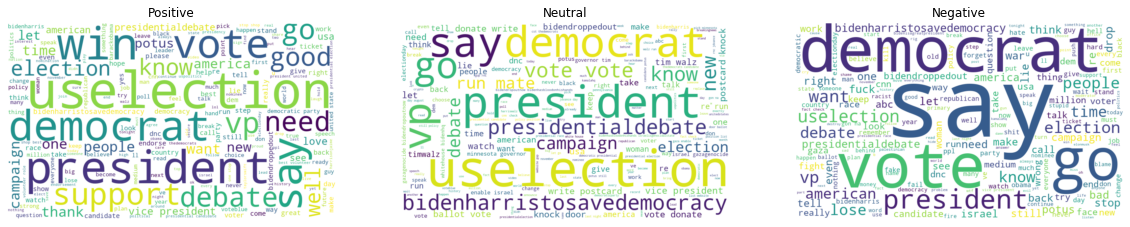

In [8]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 词云图
def generate_wordcloud(text):
    return WordCloud(width=1000, height=600, background_color='white').generate(text)

# 根据 sentiment 标签生成词云图并合成一张图
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    text = ' '.join(df[df['sentiment'] == sentiment]['removed'])
    wordcloud = generate_wordcloud(text)
    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(sentiment)

# 显示合成图
plt.show()

In [9]:
df = df.dropna(subset=['location'])

In [10]:
df['location']

0          Where The Air Gets Cold 
1                     Michigan, USA
2                      Florida, USA
4                      Brooklyn, NY
5       Fayetteville/Wilmington, NC
                   ...             
6821                 Manchester, CT
6822                      Somewhere
6824                California, USA
6825                     Boston, MA
6826                    Atlanta, GA
Name: location, Length: 4792, dtype: object

In [11]:
df = df[['location', 'compound_score', 'sentiment']]

In [12]:
df

,location,compound_score,sentiment
0,Where The Air Gets Cold,0.0000,Neutral
1,"Michigan, USA",0.5859,Positive
2,"Florida, USA",0.6597,Positive
4,"Brooklyn, NY",-0.7579,Negative
5,"Fayetteville/Wilmington, NC",0.9451,Positive
...,...,...,...
6821,"Manchester, CT",0.1531,Positive
6822,Somewhere,0.9081,Positive
6824,"California, USA",0.0000,Neutral
6825,"Boston, MA",-0.2263,Negative


In [13]:
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium

# A simplified mapping of US states to their central latitude and longitude
us_states = {
    "Alabama": (32.806671, -86.791130),
    "Alaska": (61.370716, -152.404419),
    "Arizona": (33.729759, -111.431221),
    "Arkansas": (34.969704, -92.373123),
    "California": (36.116203, -119.681564),
    "Colorado": (39.059811, -105.311104),
    "Connecticut": (41.597782, -72.755371),
    "Delaware": (39.318523, -75.507141),
    "Florida": (27.766279, -81.686783),
    "Georgia": (33.040619, -83.643074),
    "Hawaii": (21.094318, -157.498337),
    "Idaho": (44.240459, -114.478828),
    "Illinois": (40.349457, -88.986137),
    "Indiana": (39.849426, -86.258278),
    "Iowa": (42.011539, -93.210526),
    "Kansas": (38.526600, -96.726486),
    "Kentucky": (37.668140, -84.670067),
    "Louisiana": (31.169546, -91.867805),
    "Maine": (44.693947, -69.381927),
    "Maryland": (39.063946, -76.802101),
    "Massachusetts": (42.230171, -71.530106),
    "Michigan": (43.326618, -84.536095),
    "Minnesota": (45.694454, -93.900192),
    "Mississippi": (32.741646, -89.678696),
    "Missouri": (38.456085, -92.288368),
    "Montana": (46.921925, -110.454353),
    "Nebraska": (41.125370, -98.268082),
    "Nevada": (38.313515, -117.055374),
    "New Hampshire": (43.452492, -71.563896),
    "New Jersey": (40.298904, -74.521011),
    "New Mexico": (34.840515, -106.248482),
    "New York": (42.165726, -74.948051),
    "North Carolina": (35.630066, -79.806419),
    "North Dakota": (47.528912, -99.784012),
    "Ohio": (40.388783, -82.764915),
    "Oklahoma": (35.565342, -96.928917),
    "Oregon": (44.572021, -122.070938),
    "Pennsylvania": (40.590752, -77.209755),
    "Rhode Island": (41.680893, -71.511780),
    "South Carolina": (33.856892, -80.945007),
    "South Dakota": (44.299782, -99.438828),
    "Tennessee": (35.747845, -86.692345),
    "Texas": (31.054487, -97.563461),
    "Utah": (40.150032, -111.862434),
    "Vermont": (44.045876, -72.710686),
    "Virginia": (37.769337, -78.169968),
    "Washington": (47.400902, -121.490494),
    "West Virginia": (38.491226, -80.954454),
    "Wisconsin": (44.268543, -89.616508),
    "Wyoming": (42.755966, -107.302490),
}

# Map the locations to states
def map_to_state(location):
    for state in us_states.keys():
        if state.lower() in location.lower():
            return state
    return None
# Function to geocode locations to latitude and longitude
geolocator = Nominatim(user_agent="geoapi")

def geocode_location(location):
    try:
        geo_data = geolocator.geocode(location, timeout=10)
        if geo_data:
            return geo_data.latitude, geo_data.longitude
    except GeocoderTimedOut:
        return None
    return None

df['state'] = df['location'].apply(map_to_state)

# Add latitude and longitude based on state
df['latitude'] = df['state'].map(lambda x: us_states[x][0] if x else None)
df['longitude'] = df['state'].map(lambda x: us_states[x][1] if x else None)

# Filter for valid rows with a mapped state
us_data = df.dropna(subset=['state', 'latitude', 'longitude'])

# Filter data for unique and meaningful US-based locations and geocode them
unique_locations = us_data['location'].dropna().unique()[:50]  # Limit to 50 for geocoding
location_coordinates = {loc: geocode_location(loc) for loc in unique_locations}

# Convert results to a DataFrame
geo_results = pd.DataFrame.from_dict(location_coordinates, orient='index', columns=['latitude', 'longitude'])
geo_results = geo_results.dropna()  # Drop failed geocodes

# Merge geocoded data back to main dataset
us_data['coordinates'] = us_data['location'].map(location_coordinates)
us_data[['latitude', 'longitude']] = pd.DataFrame(us_data['coordinates'].tolist(), index=us_data.index)

C:\Users\86189\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\86189\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [14]:
# Filter for valid rows with a mapped state
us_data = df.dropna(subset=['state', 'latitude', 'longitude'])
us_data

,location,compound_score,sentiment,state,latitude,longitude
1,"Michigan, USA",0.5859,Positive,Michigan,43.326618,-84.536095
2,"Florida, USA",0.6597,Positive,Florida,27.766279,-81.686783
6,"USA, South Carolina - Greenvil",0.3400,Positive,South Carolina,33.856892,-80.945007
7,"USA, Washington - Seattle",0.0258,Neutral,Washington,47.400902,-121.490494
19,New York City,0.5574,Positive,New York,42.165726,-74.948051
...,...,...,...,...,...,...
6807,"New York, NY",0.0000,Neutral,New York,42.165726,-74.948051
6813,"Collinsport, Maine",0.0000,Neutral,Maine,44.693947,-69.381927
6817,Northern California,0.1027,Positive,California,36.116203,-119.681564
6818,"Youngstown, Ohio",-0.2960,Negative,Ohio,40.388783,-82.764915


In [15]:
df.state.value_counts()

New York          133
California        126
Washington        106
Texas              73
Oklahoma           73
Florida            47
New Jersey         30
Georgia            29
Ohio               26
Indiana            23
Michigan           22
Maryland           22
Virginia           19
Alabama            17
Arizona            17
Pennsylvania       16
Oregon             13
Colorado           13
North Carolina     12
Massachusetts      11
Illinois           10
Alaska             10
Tennessee          10
Minnesota           9
Kansas              9
Wisconsin           8
Iowa                7
Arkansas            7
Rhode Island        7
Maine               5
Nevada              5
South Carolina      5
Kentucky            4
Utah                4
Mississippi         4
Missouri            3
Idaho               3
Vermont             3
Louisiana           3
Hawaii              3
Delaware            2
Nebraska            2
New Mexico          2
Montana             2
South Dakota        1
New Hampsh

## 各州聚合情绪数值

In [16]:
import folium
from folium import Choropleth
import pandas as pd

# 聚合数据
state_sentiment = us_data.groupby("state", as_index=False).agg(
    avg_sentiment=("compound_score", "mean")
)

# 加载 GeoJSON 数据
geojson_url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/us-states.json"

# 创建基础地图
m = folium.Map(location=[37.8, -96], zoom_start=4)

# 添加热力图层
Choropleth(
    geo_data=geojson_url,
    name="choropleth",
    data=state_sentiment,
    columns=["state", "avg_sentiment"],
    key_on="feature.properties.name",  # 匹配 GeoJSON 的州名字段
    fill_color="RdYlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Sentiment Score",
).add_to(m)

# 保存地图或展示
m.save("harris_sentiment_map.html")  # 保存为 HTML 文件
m

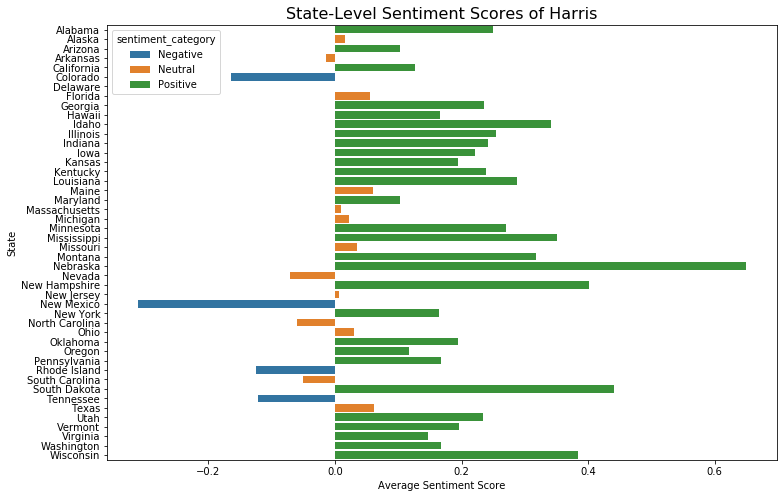

In [16]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 数据准备：按州聚合并分箱
state_sentiment = us_data.groupby("state", as_index=False).agg(
    avg_sentiment=("compound_score", "mean")
)
state_sentiment["sentiment_category"] = pd.cut(
    state_sentiment["avg_sentiment"], bins=[-1, -0.1, 0.1, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# 绘制条形图
plt.figure(figsize=(12, 8))
sns.barplot(data=state_sentiment, y="state", x="avg_sentiment", hue="sentiment_category", dodge=False)
plt.title("State-Level Sentiment Scores of Harris", fontsize=16)
plt.xlabel("Average Sentiment Score")
plt.ylabel("State")
plt.show()